In [36]:
import pandas as pd
import numpy as np
import nltk
from konlpy.tag import Okt
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from gensim import models
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt

import json
import os

In [3]:
#폰트 경로
font_path = "C:/Windows/Fonts/H2GTRM.TTF"

#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

#font 설정
matplotlib.rc('font',family=font_name)

In [4]:
review_df = pd.read_csv('../data/DiningCode_review_df')

In [5]:
review_df = review_df[review_df['review'].notnull()]
restaurants = list(review_df['res_name'].unique())

In [6]:
def get_tags_to_json(res):
    review_str = ''
    
    for review in review_df[review_df['res_name']==res]['review']:
        review_str+=str(review)
        
    okt = Okt()
    tags_dump = okt.pos(review_str, stem=True)
    tags = []
    
    for word in tags_dump:
        if word[1] == 'Adjective':
            tags.append(word[0])
            
    tags = '/'.join(tags)
    # text 파일로 저장
    with open('../data/review_tags/'+res+'.txt','w') as make_file:
        make_file.write(tags)


In [7]:
for restaurant in restaurants:
    get_tags_to_json(restaurant)

In [8]:
All_tags = []

for restaurant in restaurants:
    with open('../data/review_tags/'+restaurant+'.txt') as f:
        docs = f.read().split('/')
        All_tags+=docs

All_tags = list(set(All_tags))

In [9]:
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')

c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\programdata\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


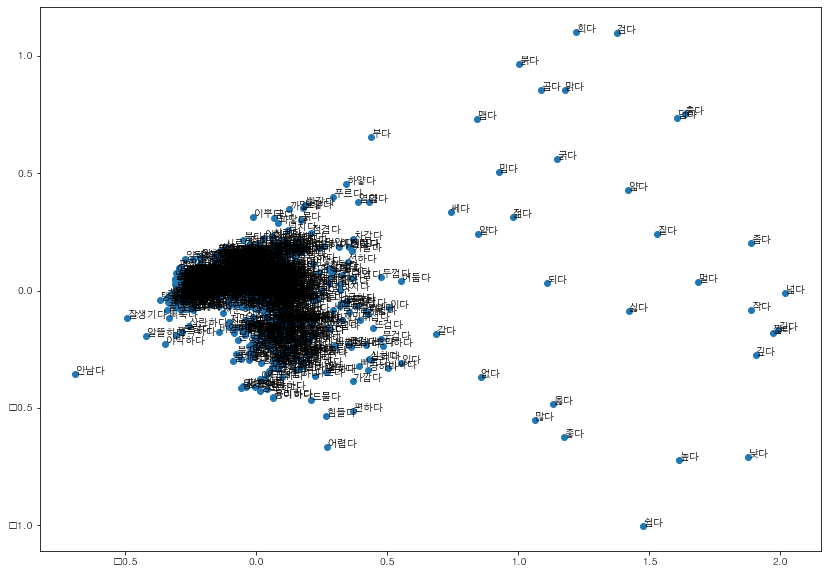

In [10]:
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in All_tags])
xs = xys[:,0]
ys = xys[:,1]
plt.figure(figsize=(14, 10))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(All_tags):
    plt.annotate(v, xy=(xs[i], ys[i]))

In [11]:
ko_model.wv.word_vec('운치있는')

array([ 3.23515316e-03, -1.44122355e-03, -8.17747638e-02,  4.61231880e-02,
        6.49930760e-02, -1.86859816e-03,  3.08580901e-02,  3.63530256e-02,
        4.65812832e-02,  3.09575372e-03, -4.47942875e-02, -1.39526548e-02,
       -9.68437642e-04,  5.35678901e-02,  1.20583080e-01,  5.72555773e-02,
        3.45472582e-02, -2.87518445e-02,  1.74929295e-02, -2.02273875e-02,
       -4.26698886e-02,  2.56524589e-02,  1.53578512e-04,  1.47120044e-01,
       -9.23347250e-02,  2.25054383e-01,  1.42958090e-02, -3.28313969e-02,
        7.17691844e-03, -3.52043323e-02, -8.20247531e-02,  9.34616756e-03,
       -1.27324024e-02, -3.66074927e-02, -1.87187623e-02, -8.31611380e-02,
        3.57123390e-02, -1.97619572e-02,  3.68778743e-02,  9.15034022e-03,
       -2.39420845e-03,  1.74316410e-02, -3.91573645e-02, -1.21175172e-02,
       -1.50920032e-02,  1.48614153e-01, -2.31579691e-02, -6.09047071e-04,
        2.43108217e-02, -5.14785685e-02, -2.24889815e-02,  7.58593110e-03,
       -9.17353705e-02,  

In [46]:
ko_model.wv.word_vec('운치있는').shape

(300,)

In [15]:
All_tags

['',
 '건강하다',
 '두드러지다',
 '무관심하다',
 '서툴다',
 '처참하다',
 '흡사하다',
 '소란하다',
 '필요없다',
 '아담하다',
 '야박하다',
 '쉽다',
 '독하다',
 '듬뿍하다',
 '적당하다',
 '분잡하다',
 '얇다',
 '넙데데하다',
 '토실하다',
 '귀찮다',
 '옅다',
 '생소하다',
 '다르다',
 '스럽다',
 '짧다',
 '따갑다',
 '잘생기다',
 '거지같다',
 '산뜻하다',
 '어리숙하다',
 '월등하다',
 '실패하다',
 '말랑말랑하다',
 '차분하다',
 '두렵다',
 '뜨겁다',
 '따스하다',
 '불필요하다',
 '몰상식하다',
 '출출하다',
 '조밀하다',
 '없다',
 '철저하다',
 '착잡하다',
 '색다르다',
 '개운하다',
 '귀엽다',
 '특출하다',
 '꾸준하다',
 '자비롭다',
 '불량하다',
 '흐뭇다',
 '피로하다',
 '희한하다',
 '배부르다',
 '무섭다',
 '놀래다',
 '평범하다',
 '불편하다',
 '훌륭하다',
 '평이하다',
 '천하다',
 '야들야들하다',
 '동일하다',
 '가난하다',
 '조잡하다',
 '연하다',
 '용하다',
 '과격하다',
 '부들부들하다',
 '위험하다',
 '명확하다',
 '맛없다',
 '근접하다',
 '어마어마하다',
 '훨낫다',
 '담담하다',
 '간편하다',
 '기쁘다',
 '번번하다',
 '화끈하다',
 '단순하다',
 '한결같다',
 '빨르다',
 '미지근하다',
 '기대하다',
 '대수롭다',
 '비슷하다',
 '어느새다',
 '유효하다',
 '균일하다',
 '포근하다',
 '사이좋다',
 '점잖다',
 '미치다',
 '뚱하다',
 '당혹스럽다',
 '건전하다',
 '푸석푸석하다',
 '오동통하다',
 '맑다',
 '유명하다',
 '빽빽하다',
 '무시무시하다',
 '기괴하다',
 '잡다하다',
 '아기자기하다',
 '희미하다',
 '불과하다',
 '드럽다',
 '저리다',
 '쎄다',
 '끊임없다',
 '

In [44]:
set(All_tags)

{'',
 '가깝다',
 '가난하다',
 '가늘다',
 '가능하다',
 '가득하다',
 '가볍다',
 '가뿐하다',
 '가지런하다',
 '가혹하다',
 '간결하다',
 '간단하다',
 '간절하다',
 '간편하다',
 '감미롭다',
 '갑작스럽다',
 '강력하다',
 '강렬하다',
 '강하다',
 '강화하다',
 '같다',
 '개운하다',
 '갠차다',
 '갸웃하다',
 '거대하다',
 '거뜬하다',
 '거만하다',
 '거북하다',
 '거슬거슬하다',
 '거지같다',
 '거칠거칠하다',
 '건강하다',
 '건방지다',
 '건장하다',
 '건전하다',
 '건조하다',
 '걸걸하다',
 '걸쭉하다',
 '검다',
 '게으르다',
 '격렬하다',
 '겸손하다',
 '계시다',
 '고급스럽다',
 '고달프다',
 '고만고만하다',
 '고맙다',
 '고소하다',
 '고슬고슬하다',
 '고요하다',
 '고통스럽다',
 '고프다',
 '곤란하다',
 '곱다',
 '공손하다',
 '공평하다',
 '과격하다',
 '괜찮다',
 '괴롭다',
 '괴상하다',
 '굉장하다',
 '교묘하다',
 '구리다',
 '구불구불하다',
 '구수하다',
 '굳다',
 '굵다',
 '굵직하다',
 '궁금하다',
 '귀엽다',
 '귀중하다',
 '귀찮다',
 '귀하다',
 '균등하다',
 '균일하다',
 '그득하다',
 '그러하다',
 '그럴듯하다',
 '그렇다',
 '그립다',
 '그만하다',
 '그을리다',
 '그지같다',
 '극소하다',
 '극심하다',
 '극악하다',
 '근사하다',
 '근접하다',
 '급격하다',
 '급하다',
 '기괴하다',
 '기대하다',
 '기막히다',
 '기발하다',
 '기쁘다',
 '긴가민가하다',
 '길다',
 '길쭉하다',
 '깊다',
 '깊숙하다',
 '까다롭다',
 '까맣다',
 '까칠하다',
 '깔끔하다',
 '깨끗하다',
 '꺼칠하다',
 '꼬들꼬들하다',
 '꼬이다',
 '꼼꼼하다',
 '꾸준하다',
 '꿋꿋하다',
 '끈적끈적하다',
 '끊임없다',


In [33]:
tags_vec = pd.DataFrame(columns=['tag']+[str(i) for i in range(300)])

In [34]:
for i in range(1,len(All_tags)):
    tags_vec.loc[i] = [All_tags[i]]+list(ko_model.wv.word_vec(All_tags[i]))

In [38]:
tags_vec.head()

,tag,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
1,건강하다,-0.033358,-0.107392,0.079212,-0.001186,-0.048449,-0.030069,-0.007499,0.001004,0.133595,...,0.013249,0.028847,0.045904,-0.028165,0.136504,0.028536,0.041849,0.012603,0.103500,0.115534
2,두드러지다,0.018185,0.010256,-0.047716,-0.012996,0.004557,-0.013141,-0.018327,-0.006541,0.017292,...,0.010328,-0.005689,0.014510,0.014435,-0.005583,-0.023036,0.031150,-0.004931,0.009841,0.009279
3,무관심하다,0.001222,0.031817,0.083566,0.017415,-0.005664,-0.016022,-0.024136,-0.002087,-0.029156,...,0.014161,0.028465,0.032042,-0.075265,-0.010045,0.030679,-0.016828,-0.013310,-0.008505,-0.023200
4,서툴다,-0.035465,0.106854,0.156820,-0.054557,0.041650,0.000100,-0.079635,-0.158097,-0.081634,...,0.072447,-0.029971,0.035325,-0.101966,-0.053876,-0.011996,-0.107442,-0.033266,0.027646,0.021350
5,처참하다,-0.076719,0.009150,0.046816,-0.033846,0.011217,-0.013326,0.062515,-0.017747,-0.009819,...,0.055262,-0.029961,-0.042899,0.036459,0.006263,0.037374,-0.015605,0.043680,0.021850,-0.022446


In [42]:
g = GaussianMixture(n_components=50)
obs = tags_vec.iloc[:,1:]

In [43]:
g.fit(obs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=50, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)